# Lecture 9: Shooting, Matching and finite difference

**Overview:**
* Time independent Schrödinger eqn.
* Numerov's method.
* Finite difference formula (discrete Laplacian).
* Displacement eqn.

**Next Lecture:**
* Boundary value problems, Laplace and Poisson equations.
---

## Tasks
### Shooting:
- How does the number of bound states in the square well change when you change the depth of the well? What about changing the width of the well? Do your finding agree with your expectations?

- Is it possible a minimum well depth above which there is no bound-state?

### Finite Difference
- Modify the code to include a simple harmonic potential i.e $V= 1/2 kx^2$.
- Compare the accuracy of the matching and finite difference methods for a simple harmonic potential. Which method do you expect to be more accurate?  How do your results compare with the exact eigen energies ?
- Try defining some other interesting potentials e.g. double square well.

In [1]:
%matplotlib notebook
import numpy as np
from scipy.integrate import odeint
import rootfinder as rtf
import matplotlib.pyplot as plt
from scipy.linalg import eigh

In [14]:
class QM(object):
    def __init__(self,E, npoints, x_start, x_end = 0, u0 = 0.0, v0 = 0.01, a = 5, V0 = 10):
        self.E = E
        self.npoints = npoints
        self.uv0 = np.array([u0, v0]) # NumPy array with initial position and velocity
        self.a = a
        self.V0 = V0
       
        # always want to start at furthest point and go to zero
        self.xarray = np.linspace(x_start, x_end, npoints, endpoint = True) # include final timepoint

    def scipy_trajectory(self):
        """calculate trajectory using SciPy ode integrator"""
        self.uv = odeint(self.sch, self.uv0, self.xarray)
        self.uv_end = self.uv[-1]


    def sch(self, uv, x):
    
        """right hand side of the differential equation"""
        u = uv[1]
        v = 2*(self.Potential(x) - self.E)*uv[0]
        return np.ravel(np.array([u, v]))

    def Potential(self, x):
        # finite square well potential
        a = self.a # width of well
        V0 = self.V0 # depth of well
        if (abs(x) > a/2.):
            return 0
        else :
            return -V0 

In [15]:
# the matching function
def match(En):
    #a = 1.0e-11
    p_up = QM(E = En, npoints = 1000, x_start = -10)
    p_down = QM(E = En, npoints = 1000, x_start = 10)
    p_up.scipy_trajectory()
    p_down.scipy_trajectory()

    return p_down.uv_end[0]*p_up.uv_end[1] - p_down.uv_end[1]*p_up.uv_end[0]

<IPython.core.display.Javascript object>


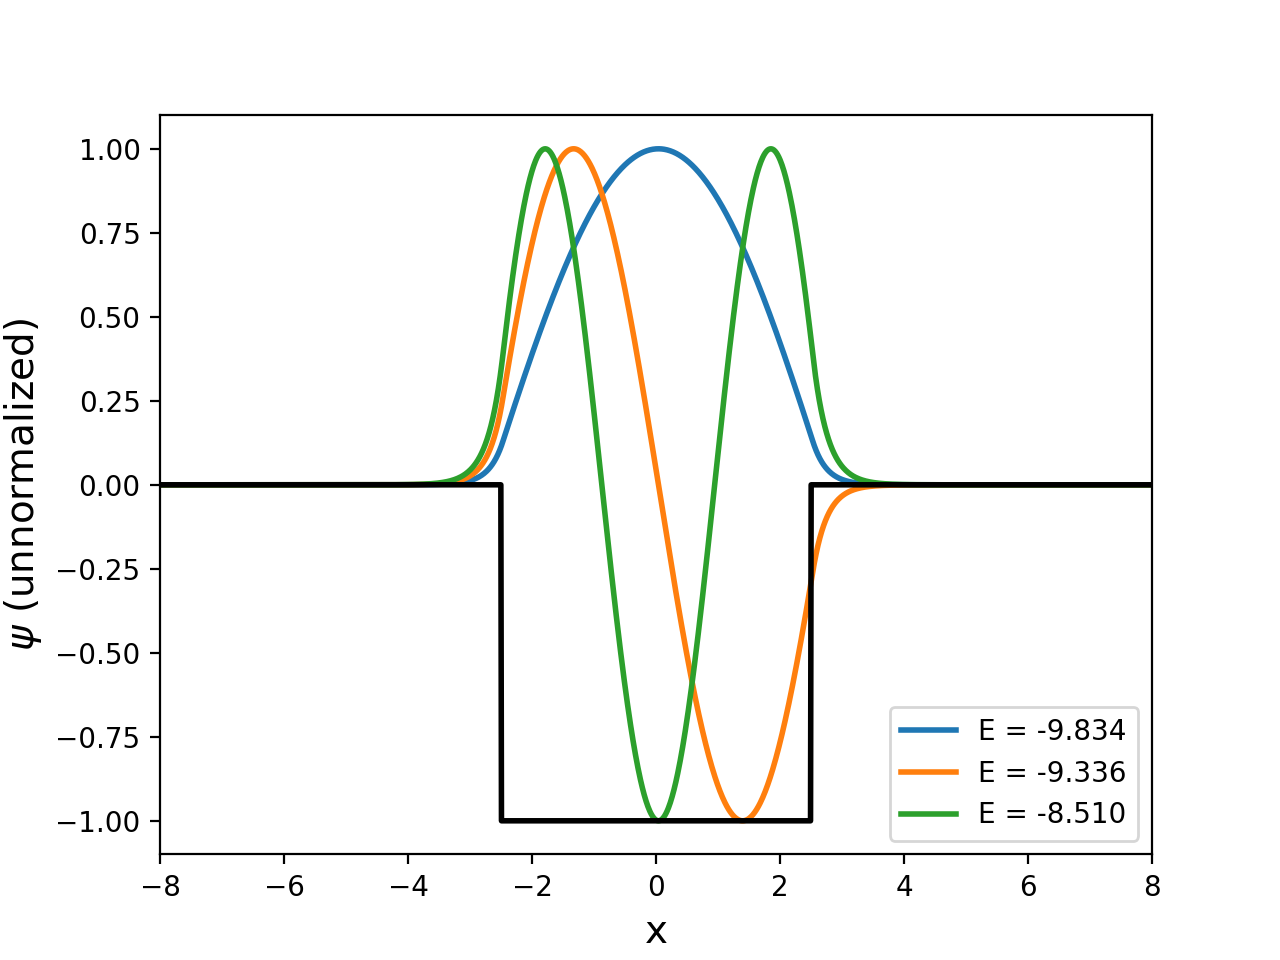

Energy found: -9.83377
Energy found: -9.33600
Energy found: -8.50973
[-9.80260791 -8.22347121]


In [27]:
a = 1.0e-3
E1 =  -10 # start Energy search at the well depth
dE = 0.01
npoints = 1000


E_SM = []

fig = plt.figure()
ax = fig.add_subplot(111)

# Bound states must have E < 0 for the square well. 
# Cut off after we have found a few states
while (E1 < -8-dE):

    if match(E1)*match(E1 + dE) < 0 :  # bracket E
        # find the energy
        E = rtf.bisect(match, E1, E1+dE, 1e-12)
        print('Energy found: %.5f'%(E))
        E_SM.append(E)
        
        dx = 16*a/npoints
        # for plotting, must ensure overlap of left and right solutions 
        p_up = QM(E, npoints = npoints+4, x_start = -10, x_end = 0+4*dx)
        p_down = QM(E, npoints = npoints-4, x_start = 10, x_end = 0+4*dx)
        
        p_up.scipy_trajectory()
        p_down.scipy_trajectory()
        
        # scale factor
        scale = p_up.uv_end[0]/p_down.uv_end[0]
        
        # full solution, combine up and down solutions
        psi_x = np.concatenate((p_up.uv[:-1,0], scale*p_down.uv[::-1,0]))
        xa = np.linspace(-10,10, 2*npoints-1, endpoint = True)
        
        # plot the scaled solution (not normalized), scale maximum to 1 for plotting purposes
        ax.plot(xa, psi_x/max(psi_x), lw = 2, label = "E = {:.3f}".format(E))
    #else : 
    #    print("No bracket, increasing energy to", E1+dE)
    E1 += dE

# Solution is exact only for for wide and deep well, and odd n 
a = 5
V0 = 10
n = np.arange(1,5,2)
Exact = -V0+np.pi**2/2/a**2*n**2
print(Exact)

# plot the potential
ax.plot(xa, np.vectorize(p_up.Potential)(xa)/10., color = 'k', lw =2)
ax.set_xlim([-8, 8])
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('$\psi$ (unnormalized)', fontsize = 14)
ax.legend(loc = 4, fontsize =10,numpoints = 1 )
plt.show()

<IPython.core.display.Javascript object>


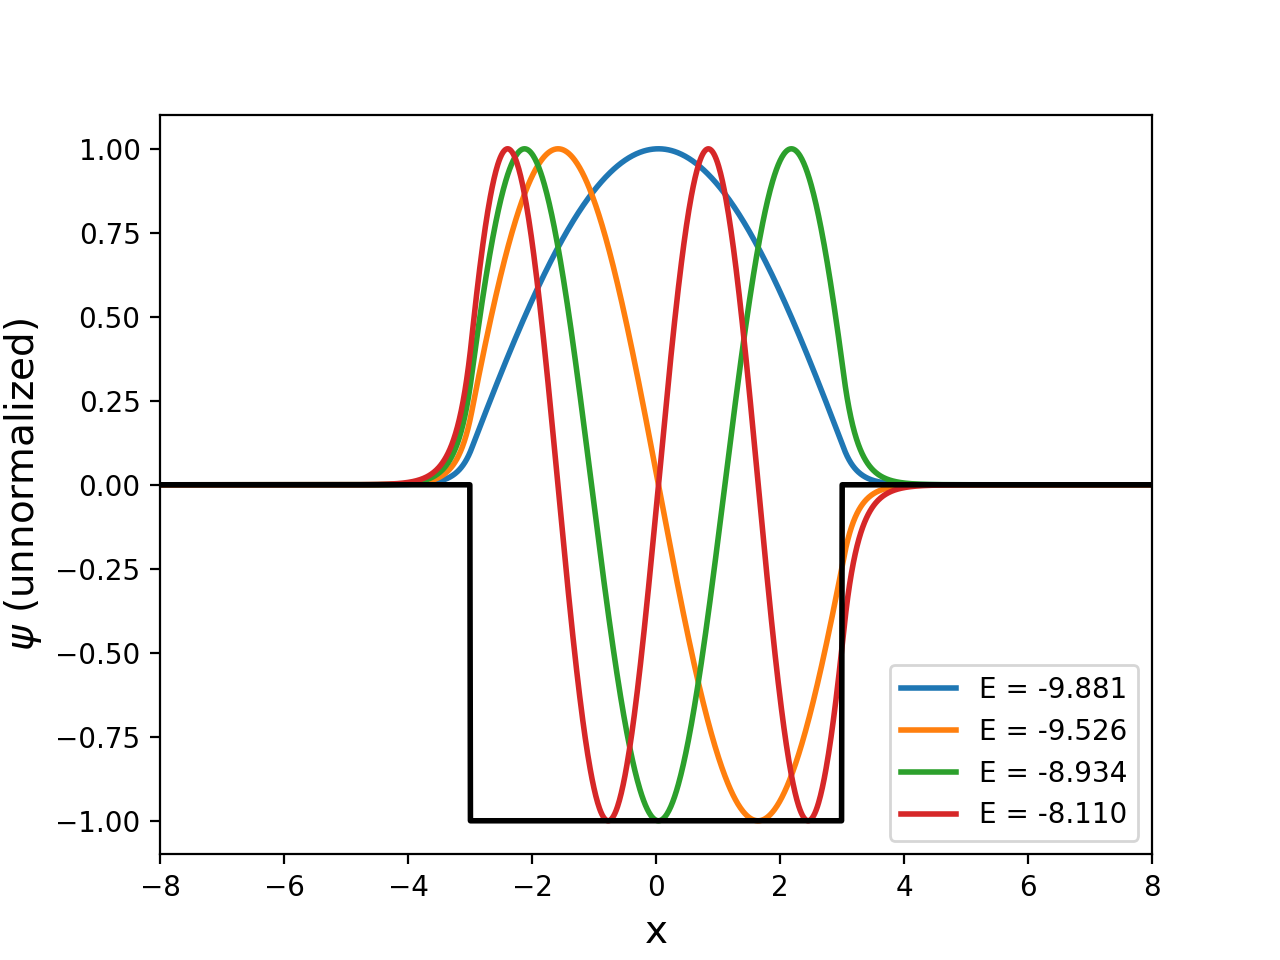

Energy found: -9.88131
Energy found: -9.52565
Energy found: -8.93428
Energy found: -8.10954


In [41]:
def match(En):
    #a = 1.0e-11
    p_up = QM(E = En, npoints = 1000, x_start = -10, a = 6)
    p_down = QM(E = En, npoints = 1000, x_start = 10, a = 6)
    p_up.scipy_trajectory()
    p_down.scipy_trajectory()

    return p_down.uv_end[0]*p_up.uv_end[1] - p_down.uv_end[1]*p_up.uv_end[0]




a = 1.0e-3
E1 =  -10 # start Energy search at the well depth
dE = 0.01
npoints = 1000

E_SM = []

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

# Bound states must have E < 0 for the square well. 
# Cut off after we have found a few states
while (E1 < -8-dE):

    if match(E1)*match(E1 + dE) < 0 :  # bracket E
        # find the energy
        E = rtf.bisect(match, E1, E1+dE, 1e-12)
        print('Energy found: %.5f'%(E))
        E_SM.append(E)
        
        dx = 16*a/npoints
        # for plotting, must ensure overlap of left and right solutions 
        p_up = QM(E, npoints = npoints+4, x_start = -10, x_end = 0+4*dx, a =6)
        p_down = QM(E, npoints = npoints-4, x_start = 10, x_end = 0+4*dx, a =6)
        
        p_up.scipy_trajectory()
        p_down.scipy_trajectory()
        
        # scale factor
        scale = p_up.uv_end[0]/p_down.uv_end[0]
        
        # full solution, combine up and down solutions
        psi_x = np.concatenate((p_up.uv[:-1,0], scale*p_down.uv[::-1,0]))
        xa = np.linspace(-10,10, 2*npoints-1, endpoint = True)
        
        # plot the scaled solution (not normalized), scale maximum to 1 for plotting purposes
        ax2.plot(xa, psi_x/max(psi_x), lw = 2, label = "E = {:.3f}".format(E))
    #else : 
    #    print("No bracket, increasing energy to", E1+dE)
    E1 += dE

ax2.plot(xa, np.vectorize(p_up.Potential)(xa)/10., color = 'k', lw =2)
ax2.set_xlim([-8, 8])
ax2.set_xlabel('x', fontsize = 14)
ax2.set_ylabel('$\psi$ (unnormalized)', fontsize = 14)
ax2.legend(loc = 4, fontsize =10,numpoints = 1 )
plt.show()


<IPython.core.display.Javascript object>


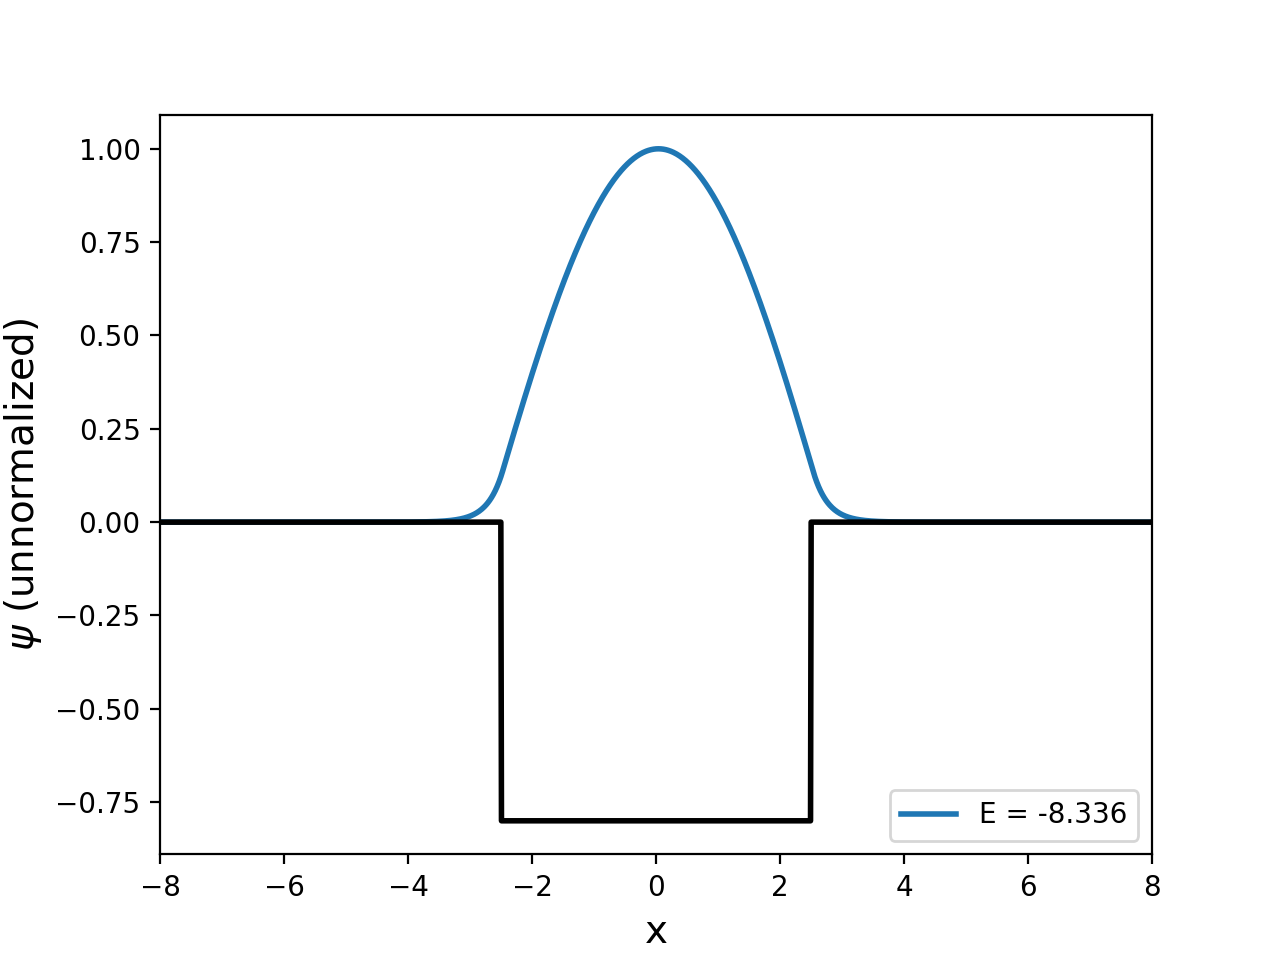

Energy found: -8.33607


In [45]:
def match(En):
    #a = 1.0e-11
    p_up = QM(E = En, npoints = 1000, x_start = -10, V0 = 8.5)
    p_down = QM(E = En, npoints = 1000, x_start = 10, V0 =8.5)
    p_up.scipy_trajectory()
    p_down.scipy_trajectory()

    return p_down.uv_end[0]*p_up.uv_end[1] - p_down.uv_end[1]*p_up.uv_end[0]




a = 1.0e-3
E1 =  -10 # start Energy search at the well depth
dE = 0.01
npoints = 1000

E_SM = []

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

# Bound states must have E < 0 for the square well. 
# Cut off after we have found a few states
while (E1 < -8-dE):

    if match(E1)*match(E1 + dE) < 0 :  # bracket E
        # find the energy
        E = rtf.bisect(match, E1, E1+dE, 1e-12)
        print('Energy found: %.5f'%(E))
        E_SM.append(E)
        
        dx = 16*a/npoints
        # for plotting, must ensure overlap of left and right solutions 
        p_up = QM(E, npoints = npoints+4, x_start = -10, x_end = 0+4*dx, V0 =8.5)
        p_down = QM(E, npoints = npoints-4, x_start = 10, x_end = 0+4*dx, V0 =8.5)
        
        p_up.scipy_trajectory()
        p_down.scipy_trajectory()
        
        # scale factor
        scale = p_up.uv_end[0]/p_down.uv_end[0]
        
        # full solution, combine up and down solutions
        psi_x = np.concatenate((p_up.uv[:-1,0], scale*p_down.uv[::-1,0]))
        xa = np.linspace(-10,10, 2*npoints-1, endpoint = True)
        
        # plot the scaled solution (not normalized), scale maximum to 1 for plotting purposes
        ax2.plot(xa, psi_x/max(psi_x), lw = 2, label = "E = {:.3f}".format(E))
    #else : 
    #    print("No bracket, increasing energy to", E1+dE)
    E1 += dE

ax2.plot(xa, np.vectorize(p_up.Potential)(xa)/10., color = 'k', lw =2)
ax2.set_xlim([-8, 8])
ax2.set_xlabel('x', fontsize = 14)
ax2.set_ylabel('$\psi$ (unnormalized)', fontsize = 14)
ax2.legend(loc = 4, fontsize =10,numpoints = 1 )
plt.show()


## Finite difference

In [17]:
def potential(x):
    """ The potential energy for a finite square well"""
    a = 5
    V0 = 10
    V = np.zeros(x.shape)
    V[np.nonzero(np.abs(x)<a/2)] = -V0   
    return V    

In [18]:
N = 2000  # number of lattice points including boundaries at 0, N-1
L = 100.0 
dx = L / N # x runs from -L/2 + dx/2 to L/2 + dx/2

# D = array(zeros((N, N))) # discrete laplacian operator
D = np.diag([-2]*(N))
D+= np.diag([1]*(N-1),1) + np.diag([1]*(N-1),-1) 
print("\nLattice Laplacian operator")
print(D)
        
x = np.linspace(0.5*(dx-L), 0.5*(L-dx), N)        
V = np.diag(potential(x)) # potential (the potential is a diagonal matrix because it's a one dimensional problem; see below
    
H = -0.5 * pow(dx, -2.0) * D + V # Hamiltonian.  Here m = hbar = 1
        
print("\nMatrix elements of Hamiltionian = ")
print(H)


Lattice Laplacian operator
[[-2  1  0 ...  0  0  0]
 [ 1 -2  1 ...  0  0  0]
 [ 0  1 -2 ...  0  0  0]
 ...
 [ 0  0  0 ... -2  1  0]
 [ 0  0  0 ...  1 -2  1]
 [ 0  0  0 ...  0  1 -2]]

Matrix elements of Hamiltionian = 
[[ 400. -200.    0. ...    0.    0.    0.]
 [-200.  400. -200. ...    0.    0.    0.]
 [   0. -200.  400. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ...  400. -200.    0.]
 [   0.    0.    0. ... -200.  400. -200.]
 [   0.    0.    0. ...    0. -200.  400.]]


In [19]:
E_FD, v = eigh(H) # diagonalize Hamiltonian

# eigh returns the array of shape (N,N) where each column is an eigenvector; 
# we transpose for plotting later

v = v.transpose() 
print("\nGround state energy = ", E_FD[0])
print("Energies of low-lying excited states = ", E_FD[1], E_FD[2], E_FD[3], E_FD[4])


Ground state energy =  -9.83394417552133
Energies of low-lying excited states =  -9.336822780606123 -8.511972729345871 -7.3657397173162735 -5.909242444118036


<IPython.core.display.Javascript object>


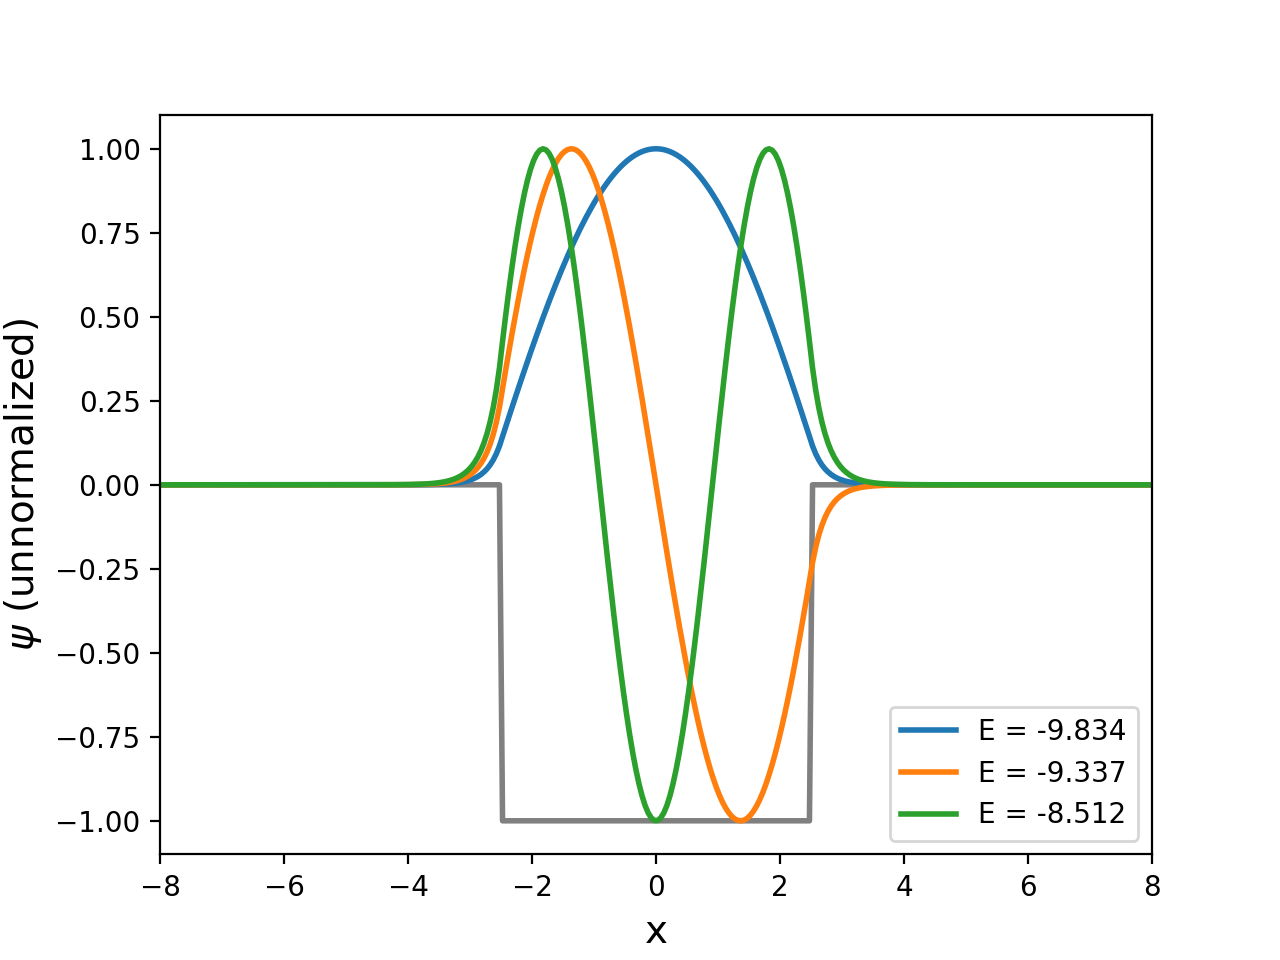

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plot potential (scaled)
ax.plot(x, potential(x)/np.max(np.abs(potential(x))), lw = 2, color = 'grey')


ax.plot(x, v[0]/np.max(v[0]), lw =2,label = "E = {:.3f}".format(E_FD[0]))
ax.plot(x, v[1]/np.max(v[1]),lw = 2, label = "E = {:.3f}".format(E_FD[1]))
ax.plot(x, v[2]/np.max(v[2]), lw = 2, label = "E = {:.3f}".format(E_FD[2]))

ax.set_xlabel("x", fontsize = 14)
ax.set_ylabel('$\psi$ (unnormalized)', fontsize = 14)

ax.set_xlim([-8,8])
#ax.set_ylim([-1, 1])
ax.legend(loc = 4, fontsize =10,numpoints = 1 )

In [9]:
# Comparision of Shooting and Matching with Finite Difference:
print("\nGround state energy")
print("Matching: \t\t", E_SM[0], "\nFinite Difference:\t", E_FD[0])

print("\nFirst excite state energy")
print("Matching: \t\t", E_SM[1], "\nFinite Difference:\t", E_FD[1])

print("\n2nd excited state energy")
print("Matching: \t\t", E_SM[2], "\nFinite Difference:\t", E_FD[2])


Ground state energy
Matching: 		 -9.833765216465958 
Finite Difference:	 -9.83394417552133

First excite state energy
Matching: 		 -9.336000745337868 
Finite Difference:	 -9.336822780606123

2nd excited state energy
Matching: 		 -8.50973393157125 
Finite Difference:	 -8.511972729345871
